<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ana Esmeralda Rodriguez Rodriguez, Antonio de Santiago Rosas Saldaña.

**Fecha:** 09 de marzo del 2021.

**Expediente** : If709288, Af713803.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: Lhttps://github.com/Tonydesanty/Proyecto-entrega-1/blob/main/Entrega%201%20proyecto.ipynb

# Proyecto TEMA-2

**Introducción:**

Hoy en día existen diferentes tipos de enfermedades letales como el cáncer, coronavirus, diabetes, entre otros. Nuestro proyecto va a ir enfocado a los accidentes cerebrovasculares, el cual ocupa el segundo puesto de las enfermedades más mortales de la actualidad.

Una lesión cerebrovascular es un tipo de lesión que se hace presente cuando el flujo sanguíneo del cerebro se detiene parcialmente. Cuando el flujo sanguíneo en el cerebro se detiene, el cerebro deja de recibir la oxigenación y los nutrientes que requiere para su funcionamiento y las células y neuronas comienzan a morir de manera rápida.
Factores que pueden influir a tener un accidente cerebrovascular:

•	Presión arterial alta.

•	Diabetes.

•	Enfermedades en el corazón.

•	Fumar.

•	Genética.

•	Edad.

•	Consumo de alcohol.

•	Consumo de drogas.

•	Colesterol.

•	Obesidad.

 

**Objetivo general:**

Crear un modelo el cuál nos de un diagnostico si una persona es poseedora de una enfermedad cerebrovascular.

**Objetivos secundarios:**

1.Encontrar mediante las simulación montecarlo la probabilidad de que una persona contraiga una enfermedad cerebrovascular por su edad.

2.-Encontrar mediante las simulación montecarlo la probabilidad de que una persona contraiga una enfermedad cerebrovascular por su nivel de masa corporal.

3.- Encontrar mediante las simulación montecarlo la probabilidad de que una persona contraiga una enfermedad cerebrovascular por su nivel de glucosa.

4.- Encontrar mediante las simulación montecarlo la probabilidad de que una persona contraiga una enfermedad cerebrovascular por tener la costumbre de fumar.



**Definición del problema**:

Las enfermedades son algo natural dentro del ciclo de vida de una persona, existen diferentes enfermedades que contrae la gente, ya sea por sus hábitos, estado psicologico, o edad. Las enfermedades cerebrovasculares son un problema en la actualidad ya que son la segunda enfermedad con mayor tasa de mortalidad, despúes de la cardipatía isquémica. 

Crear un modelo que nos ayude a encontrar la probabilidad que una persona contraiga en un futuro una enfermedad cerbrovascular sería muy interesante, ya que, podremos pronosticar si una persona podría a llegar a tener una enfermedad de este tipo con caracteristicas como edad y su índice de masa corporal, y así adelantarnos a los hechos y poder tomar decisiones para poder reducir la probabilidad de contraer esta enfermedad.


A través de una base de datos obtenida de "https://www.kaggle.com/fedesoriano/stroke-prediction-dataset?select=healthcare-dataset-stroke-data.csv" trabajaremos para poder crear un modelo el cuál nos permita predecir si una persona con ciertas caractericticas puede llegar a ser poseedora de una enfermedad cerebrovascular.


**Nodos a simular:**

*Probabilidad de contraer por su edad*: Decidimos simular está variable porque consideramos que la edad o el estado del cuerpo tiene gran impacto al momento de contraer enfermedad, a mayor edad, mayor posibilidad de contraer enfermedades.

*Probabilidad de contraer por su índice de masa corporal:* La masa corporal de las personas es un indicador de salud, normalmente las personas con mayor masa corporal son las más propensas a contraer enfermedades, por lo que tomar este indicador como nodo es muy importante ya que creemos que puede a llegar a influir de manera considerable en nuestros resultados.

*Probabildiad de contraer por sus habitos con el cigarro*: Los cigarros son nido de varias enfermedades, por lo que es interesante saber cuál es la probabilidad de contrarer la enfermedad por tus hábitos con el cigarro.

*Probabilidad mediante su nivel de glucosa*: La gluscosa es un indicador de cuanta azúcar tenemos dentro de nuestro cuerpo, tener un nivel de azúcar regulado es lo más optimo, sin embargo, cuando esta sube o baja son indicadores de que puedes tener enfermedades como diabetes, analizar esta variable puede llegarnos a dar un resultado más aproximado del cual queremos llegar.


**Hipotesis** 

Las personas más probables de contraer enfermedades cerebrovasculares son aquellas que tienen más de 70 años, fuman, tienen un alto índice de masa corporal y nivel de glucosa bajo.

*Supuestos:*

Las variables que simularemos son las más significativas al momento del estudio de esta enfermedad.

Toda la información proporcionada por los pacientes son 100% reales.

Otro tipo de enfermedades no tienen un peso relativo dentro del estudio.

Las variables a analizar no tienen precedentes importante (En caso de masa corporal y glucosa).

Las variables tienen el mismo peso al momento de presentar resultados.


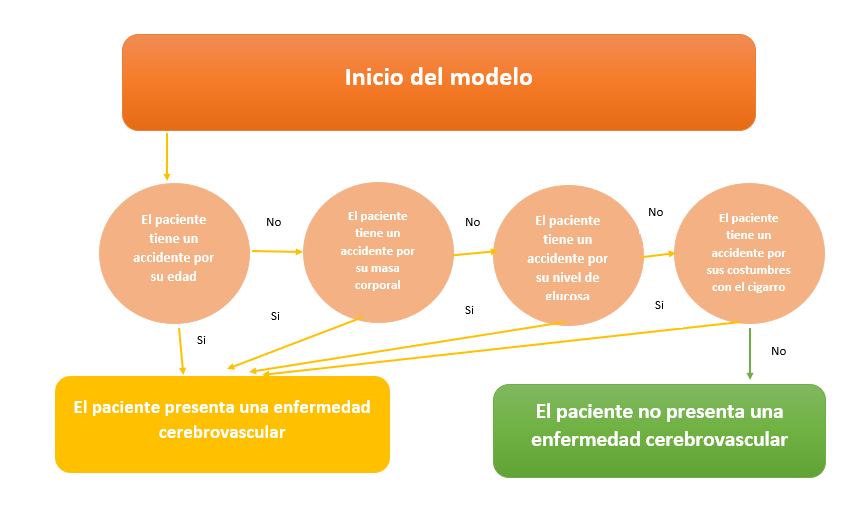

## Visualización de datos


In [1]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import collections
import scipy.stats as st
from collections import Counter

In [2]:
from statsmodels.nonparametric.kernel_density import KDEMultivariate

# funcion que retorna una funcion de densidad de probabilidad de un conjunto de datos
def kde_statsmodels_mf(x, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',
                          var_type='c', **kwargs)
    return lambda x_grid: kde.pdf(x_grid)

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,47350,Female,0,0,0,No,0,Urban,139.67,14.1,0,0
1,29955,Male,0,0,0,No,0,Rural,70.33,16.9,0,0
2,22877,Male,0,0,0,No,0,Urban,114.71,17.4,0,0
3,41500,Male,0,0,0,No,0,Rural,69.79,13.0,0,0
4,8247,Male,0,0,0,No,0,Urban,109.52,13.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,5387,Female,82,0,0,No,3,Rural,96.98,21.5,2,0
5106,19191,Male,82,0,0,Yes,3,Urban,217.57,33.5,1,0
5107,48118,Female,82,0,0,Yes,4,Urban,113.45,30.3,2,0
5108,11184,Female,82,0,0,Yes,4,Rural,211.58,36.9,2,0


In [5]:
clean_data = pd.DataFrame()
# Filtrar las variables a analizar
clean_data['age'] = data.T.loc['age']
clean_data['smoking_status'] = data.T.loc['smoking_status']
clean_data['bmi'] = data.T.loc['bmi']
clean_data['wor_type'] = data.T.loc['work_type']
# Invertir datos para tener los valores iniciales al principio
clean_data = clean_data.iloc[::-1] 
# Reemplazar index por uno que tenga los vlores de forma descendiente
clean_data['index'] = [i for i in range(len(clean_data['age']))]
clean_data.set_index('index', inplace = True)
# Eliminar hasta primer positivo
clean_data = clean_data.iloc[37:,:]
# llenar valores nulos
clean_data.fillna(0,inplace = True)
# Mostrar la cola del data frame
clean_data

,age,smoking_status,bmi,wor_type
index,,,,
37,82,2,33.3,3
38,82,1,20.3,3
39,82,0,26.5,3
40,82,2,26.0,4
41,82,2,27.0,4
...,...,...,...,...
5105,0,0,13.9,0
5106,0,0,13.0,0
5107,0,0,17.4,0


## Edad

In [7]:
totalages = clean_data['age']
totalages.head()

index
37    82
38    82
39    82
40    82
41    82
Name: age, dtype: int64

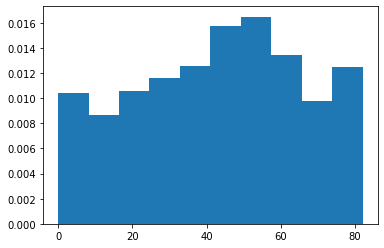

In [8]:
# plotear histograma de los datos

J = 10  # Cantidad de particiones del histograma
[freq, x_hist, _] = plt.hist(totalages,bins = J, density = True ); # histograma
plt.show() # mostrar histograma
x_hist = x_hist[1:] # Se obvia el último valor de x para obtener exactamente J muestras de x


El error de la distribucion bradford es de 17.933979416705725 %
El error de la distribucion beta es de 22.647339806234722 %
El error de la distribucion expon es de 95.42359157800738 %
El error de la distribucion exponnorm es de 44.8434298758337 %
El error de la distribucion norm es de 44.84491981007708 %
El error de la distribucion uniform es de 17.173270254287402 %


C:\Users\Santiago\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1605: RuntimeWarning: divide by zero encountered in log
  return exparg + np.log(0.5 * invK * sc.erfc(-(x - invK) / np.sqrt(2)))
C:\Users\Santiago\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


El error de la distribucion foldnorm es de 5.754678771786963e+48 %
El error de la distribucion gennorm es de 17.17328788452396 %


C:\Users\Santiago\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:98: RuntimeWarning: floating point number truncated to an integer
  return -scu._smirnovp(n, x)


El error de la distribucion ksone es de 17.93261711435573 %
El error de la distribucion kappa4 es de 20.722784341653853 %
El error de la distribucion johnsonsb es de 31.1365556296016 %


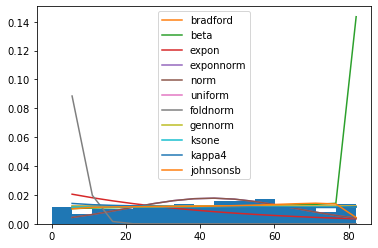

In [9]:
age = totalages

# Probar diferentes distirbuciones de probabilidad
dist_list = ['bradford', 'beta','expon', 'exponnorm','norm','uniform','foldnorm', 'gennorm', 'ksone', 'kappa4', 'johnsonsb']

y_real, x_real,  _ = plt.hist(age, bins = 15, density = True) #hacer histograma

x_real = x_real[1:] # modificar shape para que rea igual

#e = []
def distribucion(dist_list):
    
    def imprimir(dist):
        param = getattr(st, dist).fit(age)
        y_est = getattr(st, dist).pdf(x_real, *param)
        plt.plot(x_real,y_est, label = dist);
        print('El error de la distribucion', dist,'es de', (abs(y_real-y_est)*100/y_est).mean(),'%')
        
    [imprimir(dist) for dist in dist_list]


distribucion(dist_list)
plt.legend()
plt.show()

In [10]:
param = getattr(st, 'ksone').fit(x_hist) # obtener los parametros
pi = st.ksone.pdf(x_hist, *param)
# Cálculo de la esperanza usando la expresión teórica
Ei = x_hist*pi

# Cálculo teórico de la chi cuadrada
x2 = ((freq - Ei)**2 / Ei).sum()
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
m = J-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)

Valor de chi cuadrado teorico  =  5.577598299643628
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=5.577598299643628, pvalue=0.7813356619723271)
Estadístico de chi_cuadrado =  16.918977604620448


C:\Users\Santiago\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:98: RuntimeWarning: floating point number truncated to an integer
  return -scu._smirnovp(n, x)


In [ ]:
func_edad = kde_statsmodels_mf(age)
x_g = np.arange(0,100,100)
plt.figure()
plt.plot(x_g,func_edad(x_g));
plt.hist(edad,bins = 15, density = True);
plt.show()

C:\Users\Santiago\anaconda3\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


In [ ]:
f = func_edad
# encontrar el maximo de la funcion y plotearlo
x = np.arange(0,10000,100)
max_fp = f(optimize.fmin(lambda x:-f(x),0,disp=False))
plt.plot(0,max_fp,'x',lw = 10)
plt.plot(x,func_edad(x))

## Funciones a utilizar

In [3]:
# Función de aceptación y rechazo usando una constante para t(x) y se desea que dicha función regrese
# N variables aleatorias (Exactamente que acepte N valores)
def acep_rechazo_simplificada(
    N:'Cantidad de variables a generar',
    Dom_f:'Dominio de la función f como tupla (a,b)',
    f:'función objetivo a generar',
    max_f:'máximo valor de f'
):
    X = np.zeros(N)

    return X

In [4]:
def histograma_vs_densidad(signal:'variable con muestras aleatorias de la distribución generada',
                           f:'función de distribución de probablidad f(x) de la variable aleatoria'):

    plt.figure(figsize=(8,3))
    count, x, _ = plt.hist(signal,100,density=True)
    y = f(x)
    plt.plot(x, y, linewidth=2,color='k')
    plt.ylabel('Probabilidad')
    plt.xlabel('Muestras')
#     plt.legend()
    plt.show()

In [5]:
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

In [6]:
def plot_histogram_discrete(distribucion:'distribución a graficar histograma',
                            label:'label del legend'):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,density = True,bins = len(set(distribucion)) - 1) 
    plt.bar(list(set(distribucion)),y,label=label)
    plt.legend()
    plt.show()

## Nodo 1 "Edad"

In [7]:
edad = data['age']
print('La media de tener un problema cerebrovascular es de:', edad.mean())


La media de tener un problema cerebrovascular es de: 43.21526418786693


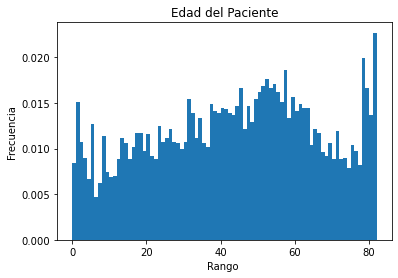

In [8]:
plt.hist(edad, density=True, bins=82)
plt.xlabel('Rango ')
plt.ylabel('Frecuencia')
plt.title('Edad del Paciente')
plt.show()

In [9]:
#Calculo de probabilidad
lista_edad=pd.DataFrame(edad)
cantidad_edad = pd.value_counts(lista_edad["age"])
cantidad_edad
#robabilidad_edad=pd.DataFrame((cantidad_edad/5110)*100)
#robabilidad_edad
#Age.sort_index().head(83)
#dad_acumulada=np.cumsum(probabilidad_edad)
#dad_acumulada
proba_edad= ((cantidad_edad/5110)*100)
proba_edad
acumulada_edad = np.cumsum(proba_edad)
acumulada_edad

78      1.996086
57      3.855186
52      5.616438
54      7.318982
51      9.001957
         ...    
11     97.553816
10     98.238748
4      98.904110
7      99.530333
6     100.000000
Name: age, Length: 83, dtype: float64

In [10]:
info=  pd.DataFrame({'Cantidad por edad':cantidad_edad, 'Probabilidad por edad':proba_edad, 'Probabilidad acumulada': acumulada_edad})
info


,Cantidad por edad,Probabilidad por edad,Probabilidad acumulada
78,102,1.996086,1.996086
57,95,1.859100,3.855186
52,90,1.761252,5.616438
54,87,1.702544,7.318982
51,86,1.682975,9.001957
...,...,...,...
11,36,0.704501,97.553816
10,35,0.684932,98.238748
4,34,0.665362,98.904110
7,32,0.626223,99.530333


In [29]:
# nombrar variable que contenga datos del df determinados
total_age = info['cantidad por edad']
total_age.head()

KeyError: 'cantidad por edad'

## Nodo 2 "Masa"

In [11]:
masa = data['bmi']
print('La media de tener un problema cerebrovascular es de:', masa.mean())


La media de tener un problema cerebrovascular es de: 28.893236911794673


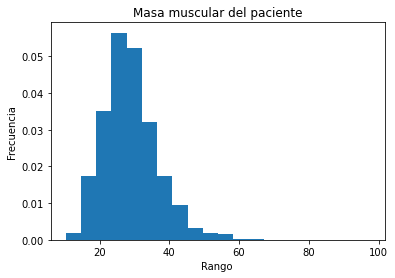

In [13]:
plt.hist(masa, density=True, bins=20)
plt.xlabel('Rango ')
plt.ylabel('Frecuencia')
plt.title('Masa muscular del paciente')
plt.show()

In [14]:
lista_masa=pd.DataFrame(masa)
cantidad_masa = pd.value_counts(lista_masa["bmi"])
cantidad_masa
proba_masa= ((cantidad_masa/4909)*100)
proba_masa
acumulada_masa = np.cumsum(proba_masa)
acumulada_masa

28.7      0.835201
28.4      1.609289
26.7      2.363007
26.1      3.116724
27.6      3.870442
           ...    
49.4     99.918517
92.0     99.938888
11.5     99.959259
46.8     99.979629
13.0    100.000000
Name: bmi, Length: 418, dtype: float64

In [15]:
info_masa=  pd.DataFrame({'Cantidad por masa':cantidad_masa, 'Probabilidad por masa':proba_masa, 'Probabilidad acumulada masa': acumulada_masa})
info_masa

,Cantidad por masa,Probabilidad por masa,Probabilidad acumulada masa
28.7,41,0.835201,0.835201
28.4,38,0.774088,1.609289
26.7,37,0.753718,2.363007
26.1,37,0.753718,3.116724
27.6,37,0.753718,3.870442
...,...,...,...
49.4,1,0.020371,99.918517
92.0,1,0.020371,99.938888
11.5,1,0.020371,99.959259
46.8,1,0.020371,99.979629


## Nodo 3 "Fumar"

**Para el caso del nodo "Fumar" se van a tener estos códigos:**

0.- No se sabe si el paciente fuma o no.

1.- Fuma de vez en cuando.

2.- Nunca ha fumado.

3.- Fuma

In [16]:
fuma = data['smoking_status']
print('La media de tener un problema cerebrovascular es de:', masa.median())

La media de tener un problema cerebrovascular es de: 28.1


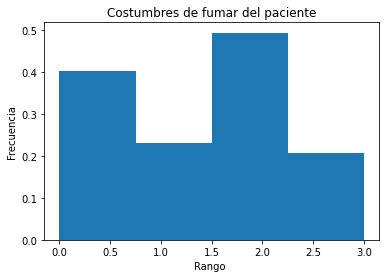

In [17]:
plt.hist(fuma, density=True, bins=4)
plt.xlabel('Rango ')
plt.ylabel('Frecuencia')
plt.title('Costumbres de fumar del paciente')
plt.show()

In [18]:
lista_fuma=pd.DataFrame(fuma)
cantidad_fuma = pd.value_counts(lista_fuma["smoking_status"])
cantidad_fuma
proba_fuma= ((cantidad_fuma/5110)*100)
proba_fuma
acumulada_fuma = np.cumsum(proba_fuma)
acumulada_fuma


2     37.025440
0     67.240705
1     84.559687
3    100.000000
Name: smoking_status, dtype: float64

In [19]:
info_fuma=  pd.DataFrame({'Cantidad por fumar':cantidad_fuma, 'Probabilidad por fumar':proba_fuma, 'Probabilidad acumulada fuma': acumulada_fuma})
info_fuma

,Cantidad por fumar,Probabilidad por fumar,Probabilidad acumulada fuma
2,1892,37.025440,37.025440
0,1544,30.215264,67.240705
1,885,17.318982,84.559687
3,789,15.440313,100.000000


## Nodo 3 "Glucosa"

In [20]:
glucosa = data['avg_glucose_level']
print('La media de tener un problema cerebrovascular es de:', glucosa.mean())

La media de tener un problema cerebrovascular es de: 106.09534246575328


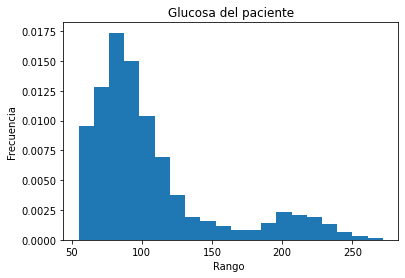

In [21]:
plt.hist(glucosa, density=True, bins=20)
plt.xlabel('Rango ')
plt.ylabel('Frecuencia')
plt.title('Glucosa del paciente')
plt.show()

In [23]:
lista_glucosa=pd.DataFrame(glucosa)
cantidad_glucosa = pd.value_counts(lista_glucosa["avg_glucose_level"])
cantidad_glucosa
proba_glucosa= ((cantidad_glucosa/5110)*100)
proba_glucosa
acumulada_glucosa = np.cumsum(proba_glucosa)
acumulada_glucosa




65.00       1.604697
62.00       2.661448
60.00       3.639922
56.00       4.598826
57.00       5.518591
             ...    
79.02      99.921722
96.59      99.941292
93.17      99.960861
167.41     99.980431
93.68     100.000000
Name: avg_glucose_level, Length: 3576, dtype: float64

## Nodo 4 "Por tipo de trabajo"

**Códigos para tipo de trabajo:**

0.- Niños.

1.- Trabajo en el gobierno

2.- Nunca ha trabajado

3.- Privado

4.- Autoempleado

In [24]:
trabajo = data['work_type']
print('La media de tener un problema cerebrovascular es de:', trabajo.median())

La media de tener un problema cerebrovascular es de: 3.0


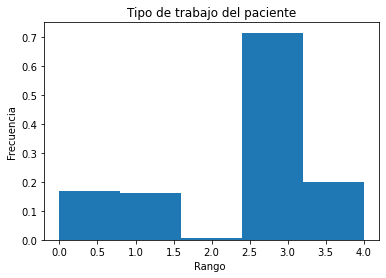

In [25]:
plt.hist(trabajo, density=True, bins=5)
plt.xlabel('Rango ')
plt.ylabel('Frecuencia')
plt.title('Tipo de trabajo del paciente')
plt.show()

In [26]:
lista_trabajo=pd.DataFrame(trabajo)
cantidad_trabajo = pd.value_counts(lista_trabajo["work_type"])
cantidad_trabajo
proba_trabajo= ((cantidad_trabajo/5110)*100)
proba_trabajo
acumulada_trabajo = np.cumsum(proba_trabajo)
acumulada_trabajo

3     57.240705
4     73.268102
0     86.712329
1     99.569472
2    100.000000
Name: work_type, dtype: float64

In [27]:
info_trabajo=  pd.DataFrame({'Cantidad por trabajo':cantidad_trabajo, 'Probabilidad por trabajo':proba_trabajo, 'Probabilidad acumulada trabajo': acumulada_trabajo})
info_trabajo

,Cantidad por trabajo,Probabilidad por trabajo,Probabilidad acumulada trabajo
3,2925,57.240705,57.240705
4,819,16.027397,73.268102
0,687,13.444227,86.712329
1,657,12.857143,99.569472
2,22,0.430528,100.000000
